## Lest Try all of our Previous knowledEe to build a model using tensorflow

Steps:
1) Get our data ready

2) Create a model

3) Fit the model

4) Evaluate a model

5) Predict the score of the model

6)save and load the model


In [ ]:
# lets just import some libraires that would help us in building a model
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# lets import some data on which we can build our data

insuarance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insuarance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
len(insuarance)

1338

In [ ]:
# To proceed further we need to convert all our data into numerics

## We can do this using two methods:

1) Using Pandas

2) USing scikit learn

In [ ]:
# lets get our data ready using pandas
insuarance_one_hot=pd.get_dummies(insuarance,dtype=int)
insuarance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Lets Create X and y
X=insuarance_one_hot.drop("charges",axis=1)
y=insuarance_one_hot["charges"]

X.head(),y.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [ ]:
# Now lets split our data into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
# Now lets just build a model
tf.random.set_seed(42)

# Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Lets fit the model
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13111.9082 - mae: 13111.9082   
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12261.5029 - mae: 12261.5029 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11422.8926 - mae: 11422.8926 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10639.2988 - mae: 10639.2988 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9966.2617 - mae: 9966.2617   
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9392.2734 - mae: 9392.2734 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8903.5371 - mae: 8903.5371 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8495.3799 - mae: 8495.3799 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8165.8208 - mae: 8165.8208 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7906.7910 - mae: 7906.7910 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7705.3936 - mae: 7705.3936 
Epoch 12/100
34/34 ━━━━━━━━━━

In [ ]:
y_pred=model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
# lets evaluate a pridiction
model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7160.6108 - mae: 7160.6108 


[6991.6494140625, 6991.6494140625]

In [ ]:
len(X_train),len(y_train),len(X_test),len(y_test),len(y_pred)

(1070, 1070, 268, 268, 268)

In [ ]:
X_train.size,y_train.size

(11770, 1070)

In [ ]:
# # lets create a plot to view how our prediction is performing

# plt.figure(figsize=(10,7))
# # plt.scatter(X_train,y_train,c="b",label="training_data")
# # plt.scatter(X_test,y_test,c="g",label="testing_data")
# plt.scatter(X_test,y_pred,c="r",label="prediction_data")
# plt.legend()

In [ ]:
# Lets try to improve our model if possible

# lets set the random seed
tf.random.set_seed(42)

# create a model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile a model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# fit the model
history_1=model_1.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10350.2666 - mae: 10350.2666   
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7717.4307 - mae: 7717.4307 
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7988.9937 - mae: 7988.9937 
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7732.5864 - mae: 7732.5864 
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7698.2368 - mae: 7698.2368 
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7845.0522 - mae: 7845.0522 
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7700.0493 - mae: 7700.0493
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7868.3350 - mae: 7868.3350 
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7828.8721 - mae: 7828.8721 
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7595.4526 - mae: 7595.4526 
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7611.9365 - mae: 7611.9365 
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━

In [ ]:
model_1.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5201.2383 - mae: 5201.2383  


[5099.59814453125, 5099.59814453125]

Text(0.5, 0, 'epochs')

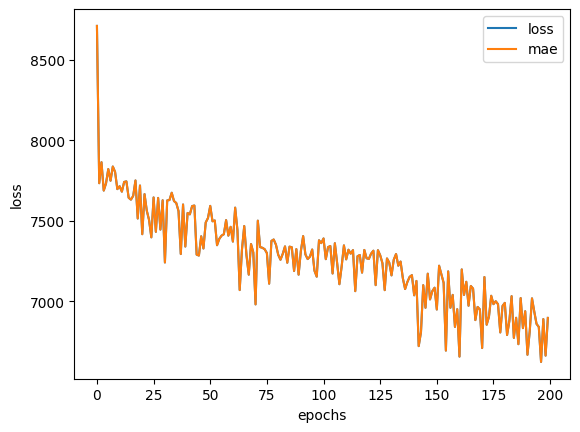

In [ ]:
# Lets plot history also known as loss curve
pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# lets try to improve more
tf.random.set_seed(42)

# Create a model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])

# compile a model
model_2.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["mae"])

# Fit the model
history_2=model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13276.8633 - mae: 13276.8633
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13135.4600 - mae: 13135.4600
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12583.4893 - mae: 12583.4893
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10971.3857 - mae: 10971.3857
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8225.9111 - mae: 8225.9111
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7429.5684 - mae: 7429.5684
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7382.3315 - mae: 7382.3315
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7339.1670 - mae: 7339.1670
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7299.4033 - mae: 7299.4033
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7257.4927 - mae: 7257.4927
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7213.7583 - mae: 7213.7583
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3

In [ ]:
model_2.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3048.0039 - mae: 3048.0039  


[3007.101318359375, 3007.101318359375]

Text(0.5, 0, 'epochs')

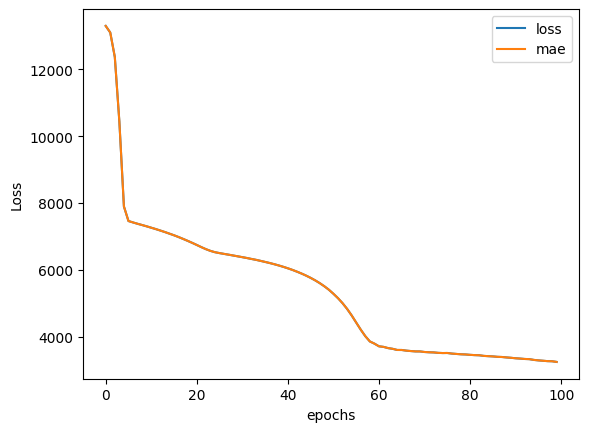

In [ ]:
# lets plot the loss curve
pd.DataFrame(history_2.history).plot()
plt.ylabel("Loss")
plt.xlabel("epochs")

In [ ]:
# Let try last time how much more we can improve our model

tf.random.set_seed(42)

# Create a model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
     tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])

# Fit the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#Fit the model
history_3=model_3.fit(X_train,y_train,epochs=500)


Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 13286.9648 - mae: 13286.9648
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11980.2295 - mae: 11980.2295
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7501.7031 - mae: 7501.7031
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7304.8052 - mae: 7304.8052
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7114.1885 - mae: 7114.1885
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6933.8359 - mae: 6933.8359
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6756.7427 - mae: 6756.7427
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6581.7456 - mae: 6581.7456
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6490.7798 - mae: 6490.7798
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6449.0361 - mae: 6449.0361
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6409.8159 - mae: 6409.8159
Epoch 12/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/s

In [ ]:
model_3.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1340.0138 - mae: 1340.0138


[1440.626220703125, 1440.626220703125]

Text(0.5, 0, 'epochs')

<Figure size 3000x3000 with 0 Axes>

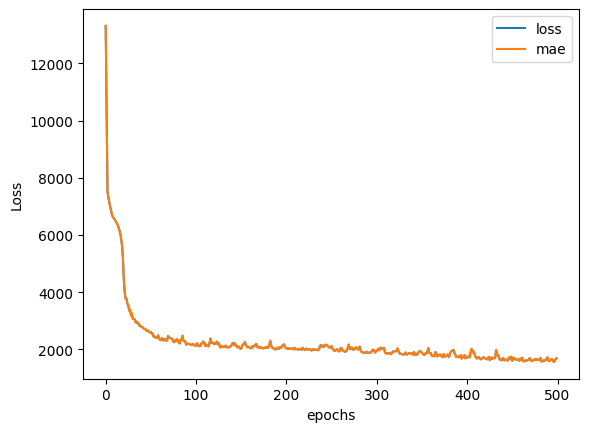

In [ ]:
# plot a loss curve
plt.figure(figsize=(30,30))
pd.DataFrame(history_3.history).plot()
plt.ylabel("Loss")
plt.xlabel("epochs")

## lets try to convert same dtaa into numeric using sckiti learn:

lets begin

Now, just as before, we need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

To do this, we're going to use a few classes from Scikit-Learn:

make_column_transformer - build a multi-step data preprocessing function for the folllowing transformations:

MinMaxScaler - make sure all numerical columns are normalized (between 0 and 1).

OneHotEncoder - one hot encode the non-numerical columns.
Let's see them in action.

In [ ]:
#lets preproess data using normalization and MinMaxScalar

insuarnace=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insuarance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
len(insuarance)

1338

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

# Lets Create a Column Transformer
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(),["sex","smoker","region"])
)

# Lets Create X and y
X=insuarance.drop("charges",axis=1)
y=insuarance["charges"]

#Now let just split our data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Fit the column transformer on our training data
ct.fit(X_train)

# Transform the training and test data using normalization(MinMAxScaler)and OneHotEncoder

X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [ ]:
# NOw lets buid our model_3 using this data as our model_3 has out perform
tf.random.set_seed(42)

# create a model
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="relu")
])

# Compile a model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]
                )
# FIt the model
history_4=model_4.fit(X_train_normal,y_train,epochs=500)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 13298.1777 - mae: 13298.1777
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13231.4619 - mae: 13231.4619
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10857.3037 - mae: 10857.3037
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7803.1377 - mae: 7803.1377
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7324.9897 - mae: 7324.9897
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6692.5029 - mae: 6692.5029
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5672.7778 - mae: 5672.7778
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4404.9282 - mae: 4404.9282
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3695.2517 - mae: 3695.2517
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3505.8020 - mae: 3505.8020
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3361.2849 - mae: 3361.2849
Epoch 12/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms

In [ ]:
model_4.evaluate(X_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1268.5084 - mae: 1268.5084


[1370.273193359375, 1370.273193359375]